## APS 5 - ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
#constantes
deltaT = 0.8
deltaX = 1e-1
deltaY = 1e-1

a = 0.1 #Valor alpha
K = 1 #coeficiente de difusão
Q = 1
Qc = Q / (deltaX*deltaY)

In [18]:
def v(x,y):
    return a * np.sin((np.pi/5)*x)

In [19]:
def diffCentral(anterior, atual, prox, delta):
    return ((prox - (2*atual) + anterior) / (delta ** 2))

def diffAvancado(prox, atual, delta):
    return ((prox - atual) / delta)

In [13]:
X = np.arange(0,0.4+deltaX,deltaX)
Y = np.arange(0,0.4+deltaY,deltaY)
t = np.arange(0,10+deltaT,deltaT)

nodeMatrix = np.zeros(shape =(len(X), len(Y)))

tolerance = 1e-7

# nodeMatrix[:,0] = 100
# nodeMatrix[:,-1] = 100
# nodeMatrix[0,:] = 0
# nodeMatrix[-1,:] = 30

#                   E    C    D    B
# isolationMatrix = [False,True,False,False]

# k = 56
# ro = 7.85e3
# cp = 480
# alpha = k/(ro*cp) #k/rô*Cp
# F0 = alpha*(deltaT/(deltaXY**2))

In [14]:
#Conta específica para o caso 2D
# def helpDiff(anterior, atual, proximo):
#     return (proximo - 2*(atual) + anterior)/(deltaXY**2);

# def helpDiff2(meio,cima, baixo, esquerda,direita, F0):
#     return F0*(cima+baixo+esquerda+direita) + (1-(4*F0))*meio

#Aplica a conta específica na lista de nodes
def calcDiff2D(nodes):
    nodes_t = nodes.copy()
    for y in range(1,len(nodes)-1):
        for x in range(1,len(nodes[0])-1):
            #nodes_t[y][x] = nodes[y][x] + deltaT*(alpha*(helpDiff(nodes[y][x-1], nodes[y][x], nodes[y][x+1]) \
            #+ helpDiff(nodes[y-1][x], nodes[y][x], nodes[y+1][x])))
#             if(isolationMatrix[0] and x==1):
#                 nodes[y][x-1] = nodes[y][x+1]
#             if(isolationMatrix[2] and x==len(nodes[0])-2):
#                 nodes[y][x+1] = nodes[y][x-1]
#             if(isolationMatrix[1] and y==1):
#                 nodes[y-1][x] = nodes[y+1][x]
#             if(isolationMatrix[3] and y==len(nodes)-2):
#                 nodes[y+1][x] = nodes[y-1][x]
                
        
            
#             nodes_t[y][x] = helpDiff2(nodes[y][x],nodes[y-1][x],nodes[y+1][x],nodes[y][x-1], nodes[y][x+1],F0)
            nodes_t[y][x] = diffAvancado(nodes[y][x],nodes[y-1][x],nodes[y+1][x],nodes[y][x-1], nodes[y][x+1],F0)
            

   
    return nodes_t

#
# Nodes: Lista de nós a ser calculada ; k: Numero máximo de iterações para resolução
# 
#
def doSomething(nodes_ref,k, tolerance):
    nodes_t = nodes_ref.copy()
    delta = np.zeros(shape =(len(nodes_ref[0]), len(nodes_ref)))
    for l in range(k):
        nodes = nodes_t.copy()
        nodes_t = calcDiff2D(nodes_t)
        
        if(l%15 == 0):
            plt.imshow(nodes_t,cmap="hot",interpolation="nearest",vmin=0, vmax=150)
            plt.axis("off")
            plt.colorbar()
            plt.savefig(f"./img/nodes{l}.png", dpi = 72)
            plt.close()
            
        
        for i in range(1, len(nodes_t) -1):
            for j in range(1, len(nodes_t[i]) -1):
                if(not(nodes_t[i][j] == 0 and nodes[i][j] == 0)):
                    delta[i][j] = 2*(nodes_t[i][j]-nodes[i][j])/(np.abs(nodes_t[i][j]) + np.abs(nodes[i][j]))
                
                if(np.abs(np.max(delta)) < tolerance):
                    print(f"Tolerancia atingida na iteração {l}!")
                    return nodes_t
                
        
    print(f"iterações insuficientes máximo delta: {np.abs(np.max(delta))}")
    return nodes_t


FileNotFoundError: [Errno 2] No such file or directory: './img/nodes0.png'

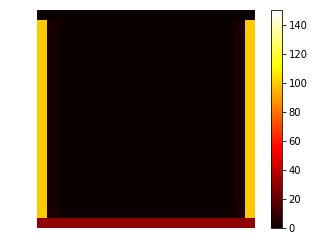

In [4]:
%%time
nodeMatrix = doSomething(nodeMatrix,12000,tolerance)


plt.imshow(nodeMatrix,cmap="hot",interpolation="nearest",vmin=0, vmax=150)
plt.axis("off")
plt.savefig("archive", dpi = 72)
plt.show()


In [5]:
plt.savefig("archive", dpi = 72)

<Figure size 432x288 with 0 Axes>

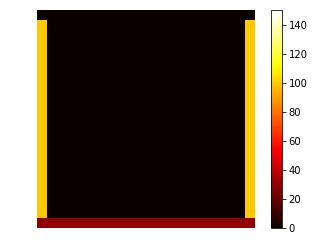

In [6]:
# nodeMatrix
copya = nodeMatrix.copy()
nodeMatrix[8][10] = 0
plt.imshow(nodeMatrix,cmap="hot",interpolation="nearest",vmin=0, vmax=150)
plt.axis("off")
plt.colorbar()
plt.savefig("archive", dpi = 72)
plt.show()


In [7]:
#O valor de copya é o ponto destacado em preto
copya[1][10]

0.0

In [8]:

nodeMatrix[8][10] = 0

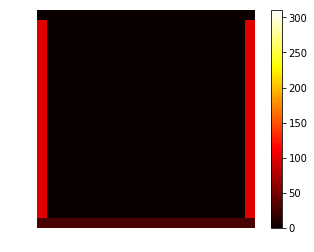

In [9]:
plt.imshow(copya,cmap="hot",interpolation="nearest",vmin=0, vmax=310)
plt.axis("off")
plt.colorbar()
plt.savefig("archive", dpi = 72)
plt.show()

In [10]:
import imageio
with imageio.get_writer('movie.gif', mode='I') as writer:
    for i in range(0,10201,15):
        image = imageio.imread(f"./img/nodes{i}.png")
        if(image is not None):
            writer.append_data(image)

ModuleNotFoundError: No module named 'imageio'

In [11]:
!rm ./img/nodes*.png

rm: cannot remove './img/nodes*.png': No such file or directory
